In [7]:
import pandas as pd
import numpy as np
from descartes import PolygonPatch
import matplotlib.pyplot as plt
import alphashape
cell_traj = pd.read_excel('MPP_CellTracks_RawValues.xlsx')

In [ ]:
points_2d = [(0., 0.), (0., 1.), (1., 1.), (1., 0.),
          (0.5, 0.25), (0.5, 0.75), (0.25, 0.5), (0.75, 0.5)]

In [ ]:
# Here is where you define your alpha shape and give it its parameters
alpha_shape = alphashape.alphashape(points_2d, 2)
alpha_shape

In [ ]:
## There is an issue with Descartes as it hasnt been updated since 2017
## Solution: pip uninstall shapely -> pip install shapely==1.8.5

fig, ax = plt.subplots()
ax.scatter(*zip(*points_2d))
# for PolygonPatch alpha_shape is the patch, alpha = intensity [0,1]
ax.add_patch(PolygonPatch(alpha_shape, alpha=0.2))
plt.show()

The alpha parameter can be defined locally within a region of points by supplying a callback that will return what alpha parameter to use. This can be utilized to create tighter fitting alpha shapes where point densitities are different in different regions of a data set. In the following example, the alpha parameter is changed based off of the value of the x-coordinate of the points.

alpha_shape = alphashape.alphashape(
    points_2d,
    lambda ind, r: 1.0 + any(np.array(points_2d)[ind][:,0] == 0.0))
alpha_shape

In [ ]:
alpha_shape = alphashape.alphashape(
    points_2d,
    lambda ind, r: 1.0 + any(np.array(points_2d)[ind][:,0] == 0.0))
alpha_shape

You can also just not put a second param into alphashape.alphashape(data)
and it will calulate it for you but this can take a while 

In [ ]:
# not choosing our own alphashape alpha param 
alpha_shape = alphashape.alphashape(points_2d)
alpha_shape

In [ ]:
fig, ax = plt.subplots()
ax.scatter(*zip(*points_2d))
ax.add_patch(PolygonPatch(alpha_shape, alpha=0.1))
plt.show()

3D -----------------------------------

In [12]:
points_3d = [
    (0., 0., 0.), (0., 0., 1.), (0., 1., 0.),
    (1., 0., 0.), (1., 1., 0.), (1., 0., 1.),
    (0., 1., 1.), (1., 1., 1.), (.25, .5, .5),
    (.5, .25, .5), (.5, .5, .25), (.75, .5, .5),
    (.5, .75, .5), (.5, .5, .75)
]
# Quite easy to turn into a data frame and get the indiv values
df_3d = pd.DataFrame(points_3d, columns=['x', 'y', 'z'])

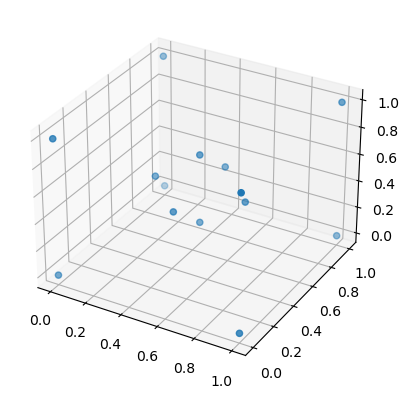

In [13]:
# Plotting the data points
fig = plt.figure()
ax = plt.axes(projection='3d')
# put each of the x array y and z into those positions in scatter
ax.scatter(df_3d['x'], df_3d['y'], df_3d['z'])
plt.show()

In [14]:
# Plotting the raw alpha shape
## you might be able to call alphashape on data frame and list/array
## to run with df use df.values
alpha_shape = alphashape.alphashape(df_3d.values)
alpha_shape.show()

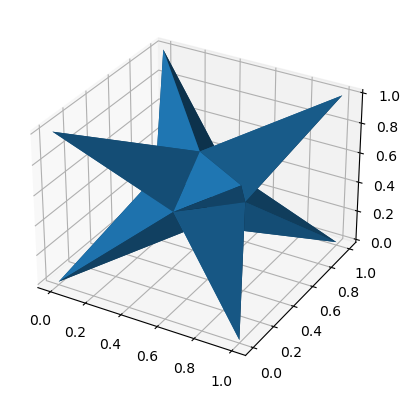

,x-coordinate (um),y-coordinate (um),z-coordinate (um)
0,10.5564,177.909,13.83590
1,10.0210,175.347,15.02670
2,9.8610,173.524,16.44360
3,9.5210,169.617,17.67640
4,9.0260,170.557,17.00450
...,...,...,...
8144,129.5120,199.196,2.50000
8145,128.6370,198.305,2.50000
8146,128.4910,200.750,6.86505
8147,130.0980,199.199,2.50000


In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(*zip(*alpha_shape.vertices),triangles=alpha_shape.faces)
plt.show()
cell_traj

Working with the data we had from the start

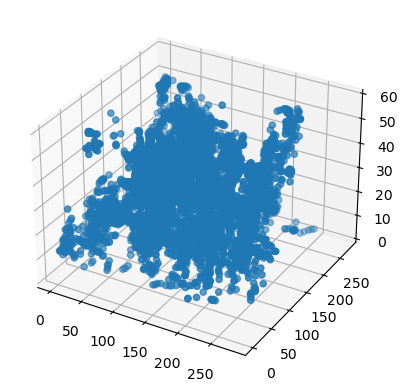

,x-coordinate (um),y-coordinate (um),z-coordinate (um)
0,10.5564,177.909,13.83590
1,10.0210,175.347,15.02670
2,9.8610,173.524,16.44360
3,9.5210,169.617,17.67640
4,9.0260,170.557,17.00450
...,...,...,...
8144,129.5120,199.196,2.50000
8145,128.6370,198.305,2.50000
8146,128.4910,200.750,6.86505
8147,130.0980,199.199,2.50000


In [28]:
# Cleaning the data

# Plotting
fig = plt.figure()
ax = plt.axes(projection='3d')
# put each of the x array y and z into those positions in scatter
ax.scatter(cell_traj['x-coordinate (um)'], cell_traj['y-coordinate (um)'], cell_traj['z-coordinate (um)'])
plt.show()
cell_traj

In [48]:
# Extracting Values
#cell_traj.drop('Time increment (3-min interval)', axis = 1, inplace=True)
raw_traj = cell_traj.values
raw_traj_20 = raw_traj[:174]
raw_traj_20

array([[ 10.5564 , 177.909  ,  13.8359 ],
       [ 10.021  , 175.347  ,  15.0267 ],
       [  9.861  , 173.524  ,  16.4436 ],
       [  9.521  , 169.617  ,  17.6764 ],
       [  9.026  , 170.557  ,  17.0045 ],
       [  8.864  , 169.753  ,  16.8822 ],
       [  8.452  , 169.87   ,  16.9977 ],
       [  8.274  , 170.066  ,  16.9809 ],
       [  7.967  , 166.8    ,  17.3747 ],
       [  7.856  , 165.343  ,  17.591  ],
       [  7.681  , 165.771  ,  17.2219 ],
       [  7.436  , 165.52   ,  17.3556 ],
       [  6.539  , 163.54   ,  18.061  ],
       [  5.368  , 163.892  ,  18.165  ],
       [  4.87547, 164.428  ,  18.3226 ],
       [  5.60498, 164.143  ,  17.9235 ],
       [  6.84324, 166.121  ,  17.8815 ],
       [  6.84215, 165.082  ,  18.3055 ],
       [  7.00545, 163.201  ,  18.7754 ],
       [  5.68553, 160.442  ,  20.1298 ],
       [  7.03689, 160.903  ,  20.2439 ],
       [  6.31686, 160.742  ,  19.8578 ],
       [  5.7941 , 161.237  ,  19.3189 ],
       [  4.94674, 161.852  ,  19.

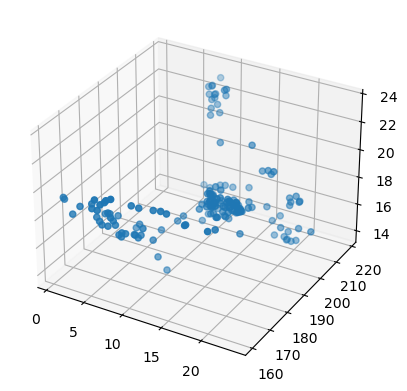

In [49]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# put each of the x array y and z into those positions in scatter
#ax.scatter(raw_traj_20[0:], raw_traj_20[1:], raw_traj_20[2:])

ax.scatter(*zip(*raw_traj_20))
plt.show()

In [50]:
alpha_shape = alphashape.alphashape(raw_traj_20)
alpha_shape.show()

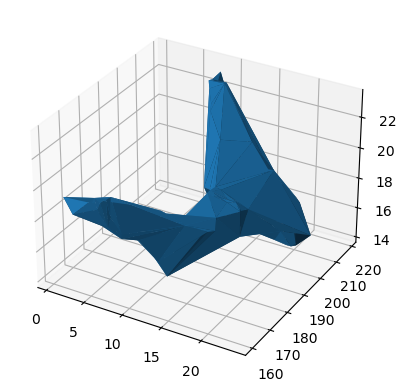

In [51]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(*zip(*alpha_shape.vertices),triangles=alpha_shape.faces)
plt.show()